<a href="https://colab.research.google.com/github/athadis/archana_INFO5502_Spring2022/blob/main/in_class_exercises/lab_assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The fourth Lab-assignment (02/17/2022, 50 points in total)

The purpose of this exercise is to understand Exploratory Data Analysis, we will practice the EDA by working on multiple datasets which have different characteristics.

Question 1 (15 points). Understand a text corpus for domain-specific text classification. Download the dataset from the following link: https://osf.io/8mjcy/ . Conduct EDA of the dataset from the following aspects:

(1) How many categories in total?

(2) How many documents under each category?

(3) What is the avergae number of sentence (on average)?

(4) What is the average number of words (on average)?

(5) Visualize the top 50 terms and rank the terms by frquency (remove stop words first: https://gist.github.com/sebleier/554280).

In [124]:
# Your answer here (code + explanation):
import pandas
from zipfile import ZipFile
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#reading zip file and getting files info
with ZipFile('preprocessed_cases[cases_29404].zip', 'r') as zipObj:
   file_info_list=zipObj.infolist()

#getting all folders inside parent folder
categories = []
parent_dir = 'preprocessed_cases[cases_29404]/'
for file_info in file_info_list:
  if(file_info.is_dir() and file_info.filename!= parent_dir):
    categories.append(int(file_info.filename.split('/')[-2]))
print('1) Total number of categories is ',len(categories))

# files under each category
categories.sort()
for category in categories:
  documents_count = 0
  for file_info in file_info_list:
    if(file_info.is_dir()==False and file_info.filename.startswith(parent_dir+str(category)+'/')):
      documents_count+=1
  print(' Total number of documents in {} category is {}'.format(category,documents_count))

#declaring required variables
sentence_count=0
file_count =0
words =[]
stop_words = stopwords.words('english')

#opening each zip file and counting words, sentences, 
with ZipFile('preprocessed_cases[cases_29404].zip', 'r') as zipObj:
  for file_info in file_info_list:
    if(file_info.is_dir()==False):
      file_count+=1
      content_file=zipObj.open(file_info.filename,'r')
      content=content_file.read()

      words.extend(content.decode().split())
      sentence_count+= str(content).count('.')+str(content).count('?')+str(content).count('!')
      
#getting list of words excluding stop words   
words_without_stop_words=[str(word) for word in words if str(word).lower() not in stop_words]

print('3) Average number of sentences per file is ', sentence_count/file_count ) 
print('4) Average number of words per file is ', len(words)/file_count)
print('5) Top 50 terms and their frequencies are as follows ', Counter(words_without_stop_words).most_common(50))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
1) Total number of categories is  76
 Total number of documents in 1 category is 775
 Total number of documents in 2 category is 179
 Total number of documents in 3 category is 184
 Total number of documents in 4 category is 231
 Total number of documents in 5 category is 751
 Total number of documents in 6 category is 380
 Total number of documents in 7 category is 621
 Total number of documents in 8 category is 521
 Total number of documents in 9 category is 744
 Total number of documents in 10 category is 584
 Total number of documents in 11 category is 605
 Total number of documents in 12 category is 275
 Total number of documents in 13 category is 458
 Total number of documents in 14 category is 277
 Total number of documents in 15 category is 257
 Total number of documents in 16 category is 826
 Total number of documents in 17 category is 125
 Total number of doc

Question 2 (20 points). Continue practicing how to do simple exploratory data analysis with Python. The dataset that has been used in this question is called Student Academics Performance Data Set, which can be downloaded at: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/lab-assignment-04-student-performance.csv . Please conduct the following analysis:

(1) Description of all the columns: for each colmun, count number of rows, number of unqiue element, the frequency of each unqiue element. 


(2)  Visualize the count for each value in the 'Study Hours' column. Note: Study Hours values comes from this >= 6 hours Good >= 4 hours Average < 2 hours Poor.

(3) Using factorplot to show the relationship between numerical and categorical value. Please use figure to show relation between [Study Hours] and [End Semester Percentage]. Percentage is calculated based on the following:

if percentage >=80 then Best
If percentage >= 60 but less than 80 then Very Good
If percentage >= 45 but less than 60 then Good
If Percentage >= 30 but less than 45 then Pass
If Percentage < 30 then Fail

(4) Get the correlation from the data, then plug it to heatmap function and show it as following:

![heatmap.png](attachment:heatmap.png)

1) Description of columns is shown below
          ge  cst   tnp   twp  iap   esp  arr         ms   ls    as  ...   fq  \
count   131  131   131   131  131   131  131        131  131   131  ...  131   
unique    2    5     4     4    4     4    2          1    2     2  ...    6   
top       M  OBC  Good  Good   Vg  Good    N  Unmarried    V  Paid  ...   Um   
freq     72   57    59    65   63    54   78        131   92    76  ...   40   

         mq       fo         mo     nf       sh    ss   me     tt   atd  
count   131      131        131    131      131   131  131    131   131  
unique    6        5          5      3        3     2    4      3     3  
top      Um  Service  Housewife  Large  Average  Govt  Eng  Small  Good  
freq     52       38        115     58       59    91   62     78    56  

[4 rows x 22 columns]
2) Visualization of counts for study hours column are shown below
 Average    59
Poor       45
Good       27
Name: sh, dtype: int64
3) Factor plot for StudyHours (s

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


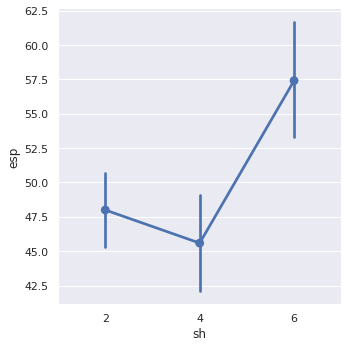

4) Heat map for correlation data is shown below


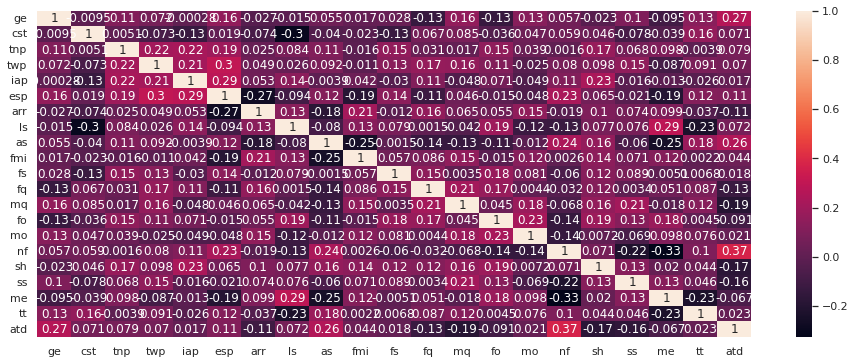

In [ ]:
# Your answer here (code + explanation):
import pandas
import seaborn
import numpy
import matplotlib.pyplot as plt

#reading csv using pandas
student_data=pandas.read_csv('lab-assignment-04-student-performance.csv')
print('1) Description of columns is shown below\n',student_data.describe())

print('2) Visualization of counts for study hours column are shown below\n',student_data['sh'].value_counts())

#convert all categorical columns to numeric using the conversion shown in the question for grades, study-hours
student_data['sh'].replace(['Good','Average','Poor'],[6,4,2],inplace=True)
student_data['esp'].replace(['Best','Vg','Good','Pass','Fail'],[80,60,45,30,20],inplace=True)
#plotting factor plot using seaborn.factorplot with studyhours(sh) on X axis and esp on Y axis

print('3) Factor plot for StudyHours (sh) vs EndSemesterPercentage(esp) is shown below')
seaborn.factorplot(data=student_data, x='sh',y='esp')
plt.show()

#factorizing python data so we can create a heat map with the processed data
#dropping ms column because it has empty or invalid values
student_data.drop(columns=['ms'], inplace=True)
student_data=student_data.apply(lambda x: pandas.factorize(x)[0])
# creating correlation data
correlation_student_data = student_data.corr()

plt.figure(figsize=(16, 6))
print('4) Heat map for correlation data is shown below')
seaborn.heatmap(data=correlation_student_data,annot=True)
plt.show()


Question 3 (15 points). Download a dataset from Kaggle or other sources. Propose three questions that you wanna to know from the dataset, then write python code to conduct EDA analysis to answer the three questions

In [ ]:
# Your three questions:

'''
Downloaded a dataset from kaggle and founded the dataset here
 https://www.kaggle.com/majyhain/height-of-male-and-female-by-country-2022.
This dataset is about "Height of Male and Female by Country 2022".
The three questions that I want to know from the dataset are 

1)Average height in the United States.
2)Average male height and average female height in the World.
3)Which country has the tallest population .
'''

'\nDownloaded a dataset from kaggle and founded the dataset here\n https://www.kaggle.com/majyhain/height-of-male-and-female-by-country-2022.\nThis dataset is about "Height of Male and Female by Country 2022".\nThe three questions that I want to know from the dataset are \n\n1)Average height in the United States.\n2)Average male height and average female height in the World.\n3)Which country has the tallest population .\n'

In [ ]:
# You code to answer the three questions (Please add comments in the code):
import pandas

#reading csv file using pandas
height_data=pandas.read_csv('Height of Male and Female by Country 2022.csv')

#retrieve united States values from data frame
select_height = height_data.loc[height_data['Country Name'] == 'United States']
average_height_in_united_states=(select_height['Male Height in Ft']+select_height['Female Height in Ft'])/2
print('1) Average height in United States is',float(average_height_in_united_states))

#retrieve mean height of the world from data frame
world_population_height_mean=(float(height_data[["Male Height in Ft"]].mean()) + float(height_data[["Female Height in Ft"]].mean()))/2
print('2) World population average height',world_population_height_mean)

# adding a new column to the data frame to store average height value
height_data['Average height'] = height_data.apply(lambda row: (row["Male Height in Ft"] + row["Female Height in Ft"])/2, axis=1)
max_avg_height_row = height_data.loc[height_data['Average height']==height_data['Average height'].max()]
print('3) Country with tallest population by average height is ',max_avg_height_row["Country Name"].values[0])


1) Average height in United States is 5.585
2) World population average height 5.479597989949756
3) Country with tallest population by average height is  Netherlands
